# Y 변수 분석

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

train_df = pd.read_csv("/Users/cdsjw/MLAutonomousDriving_workspace/Scikit/train.csv")
def show_graph(y_column):#데이터 그래프 표현 함수
    f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
    ydata = train_df.filter(regex=y_column)
    sns.histplot(ydata[y_column], color="blue", ax=axes[0], bins = 300)
    sns.boxplot(x = y_column, orient="h", data = ydata, ax=axes[1])
    print(ydata.describe())

def select_X(ypara):
    variables = train_df.columns[1:57].tolist() ## 설명 변수 리스트
    y = train_df[ypara] ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
 
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder,dtype='float64') ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = train_df[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit()
            pval[col] = model.pvalues[col]
 
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = train_df[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
        
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(train_df[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    return selected_variables

## Y_01 : 안테나 Gain 평균 (각도1) 

               Y_01
count  39607.000000
mean       1.353814
std        0.356223
min        0.017000
25%        1.127500
50%        1.349000
75%        1.576000
max        4.409000


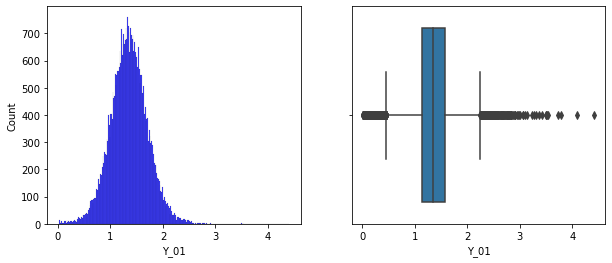

In [20]:
show_graph("Y_01")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [21]:
print(select_X('Y_01'))

['X_48', 'X_22', 'X_19', 'X_18', 'X_52', 'X_17', 'X_45', 'X_13', 'X_49', 'X_51', 'X_40', 'X_46', 'X_04', 'X_23', 'X_47', 'X_03', 'X_06', 'X_20', 'X_05', 'X_27', 'X_24', 'X_07', 'X_21', 'X_15', 'X_43', 'X_42', 'X_33', 'X_41', 'X_56', 'X_30', 'X_31', 'X_25', 'X_39']


## Y_02 : 안테나 1 Gain 편차

               Y_02
count  39607.000000
mean       1.057267
std        0.386266
min        0.007000
25%        0.793000
50%        1.044000
75%        1.300000
max        3.998000


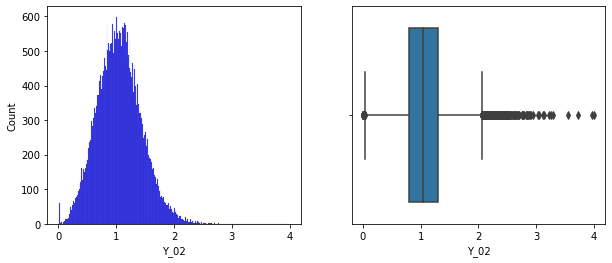

In [3]:
show_graph("Y_02")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [23]:
print(select_X('Y_02'))

['X_48', 'X_22', 'X_18', 'X_43', 'X_17', 'X_51', 'X_42', 'X_49', 'X_40', 'X_05', 'X_52', 'X_06', 'X_45', 'X_27', 'X_24', 'X_25', 'X_56', 'X_09', 'X_19', 'X_20', 'X_46', 'X_04', 'X_23', 'X_47', 'X_16', 'X_15', 'X_41', 'X_28', 'X_39']


## Y_03 : 안테나 2 Gain 편차

In [1]:
show_graph("Y_03")

NameError: name 'show_graph' is not defined

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [25]:
print(select_X('Y_03'))

['X_48', 'X_18', 'X_17', 'X_43', 'X_22', 'X_19', 'X_49', 'X_51', 'X_05', 'X_13', 'X_42', 'X_24', 'X_25', 'X_52', 'X_06', 'X_40', 'X_46', 'X_45', 'X_56', 'X_04', 'X_23', 'X_47', 'X_32', 'X_03', 'X_27', 'X_33', 'X_01', 'X_20', 'X_21', 'X_12', 'X_10', 'X_39', 'X_28', 'X_16', 'X_41']


## Y_04 : 평균 신호대 잡음비

               Y_04
count  39607.000000
mean      13.621191
std        2.686632
min       -0.331000
25%       11.822000
50%       13.837000
75%       15.626000
max       98.794000


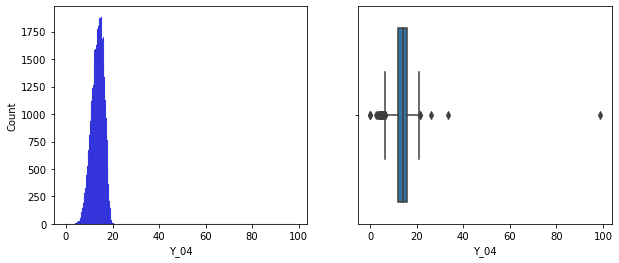

In [26]:
show_graph("Y_04")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [27]:
print(select_X('Y_04'))

['X_48', 'X_04', 'X_23', 'X_47', 'X_30', 'X_21', 'X_32', 'X_16', 'X_17', 'X_12', 'X_19', 'X_03', 'X_24', 'X_54', 'X_50', 'X_52', 'X_56', 'X_22', 'X_09', 'X_25', 'X_06', 'X_40', 'X_44', 'X_42', 'X_51', 'X_55', 'X_18', 'X_20', 'X_08', 'X_26', 'X_10', 'X_53', 'X_37', 'X_35', 'X_15']


## Y_05 : 안테나 Gain 평균 (각도2)

               Y_05
count  39607.000000
mean      31.290467
std        2.543222
min       18.589000
25%       29.768000
50%       31.710000
75%       33.184000
max       37.250000


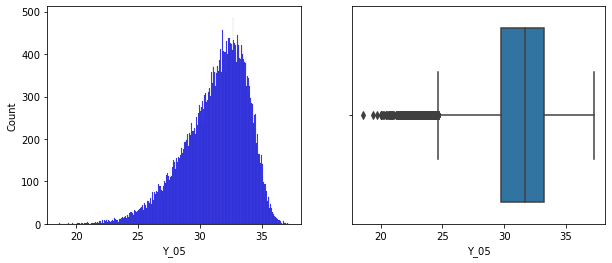

In [28]:
show_graph("Y_05")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [29]:
print(select_X('Y_05'))

['X_48', 'X_56', 'X_32', 'X_12', 'X_15', 'X_18', 'X_17', 'X_04', 'X_23', 'X_47', 'X_33', 'X_29', 'X_09', 'X_40', 'X_54', 'X_50', 'X_44', 'X_49', 'X_51', 'X_55', 'X_03', 'X_30', 'X_19', 'X_28', 'X_53', 'X_13', 'X_35', 'X_01', 'X_06', 'X_52', 'X_37', 'X_31', 'X_45', 'X_26', 'X_10']


## Y_06 : 신호대 잡음비 (각도1)

               Y_06
count  39607.000000
mean      16.529382
std        1.893014
min      -19.963000
25%       16.146000
50%       16.694000
75%       17.164000
max       18.998000


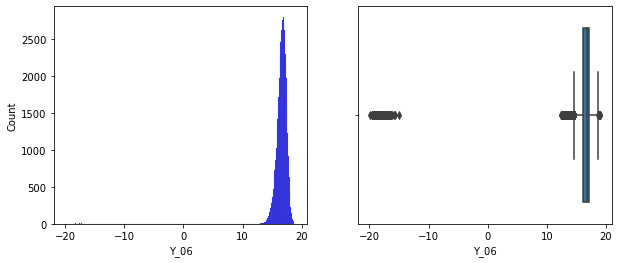

In [30]:
show_graph("Y_06")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [31]:
print(select_X('Y_06'))

['X_48', 'X_19', 'X_30', 'X_56', 'X_05', 'X_06', 'X_26', 'X_49', 'X_17', 'X_18', 'X_16', 'X_44', 'X_13', 'X_43', 'X_51', 'X_55', 'X_50', 'X_09', 'X_04', 'X_23', 'X_47', 'X_03', 'X_22']


## Y_07 : 안테나 Gain 평균 (각도3)

               Y_07
count  39607.000000
mean       3.155054
std        0.418940
min        0.502000
25%        2.863000
50%        3.126000
75%        3.433500
max        5.299000


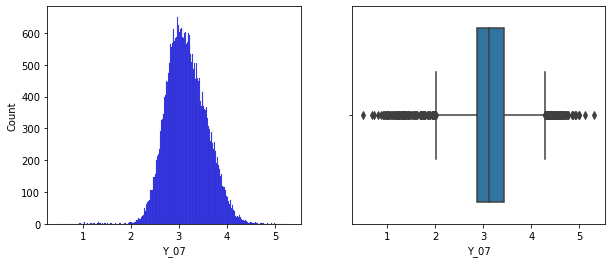

In [32]:
show_graph("Y_07")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [33]:
print(select_X('Y_07'))

['X_48', 'X_04', 'X_23', 'X_47', 'X_19', 'X_32', 'X_21', 'X_15', 'X_18', 'X_03', 'X_17', 'X_50', 'X_54', 'X_41', 'X_24', 'X_12', 'X_14', 'X_38', 'X_31', 'X_09', 'X_56', 'X_52', 'X_06', 'X_05', 'X_22', 'X_33', 'X_29', 'X_55']


## Y_08 : 신호대 잡음비 (각도2)

               Y_08
count  39607.000000
mean     -26.294839
std        0.660537
min      -29.652000
25%      -26.689000
50%      -26.254000
75%      -25.855000
max      -23.785000


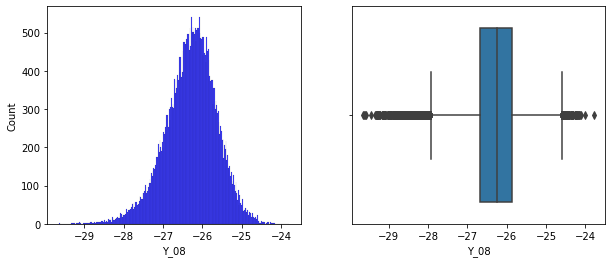

In [34]:
show_graph("Y_08")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [35]:
print(select_X('Y_08'))

['X_48', 'X_20', 'X_32', 'X_30', 'X_03', 'X_42', 'X_22', 'X_52', 'X_40', 'X_17', 'X_18', 'X_15', 'X_10', 'X_51', 'X_55', 'X_04', 'X_23', 'X_47', 'X_09', 'X_27', 'X_56', 'X_41', 'X_14', 'X_54', 'X_53', 'X_35', 'X_44']


## Y_09 : 신호대 잡음비 (각도3)

               Y_09
count  39607.000000
mean     -26.308623
std        0.653580
min      -29.523000
25%      -26.702000
50%      -26.266000
75%      -25.871000
max      -23.960000


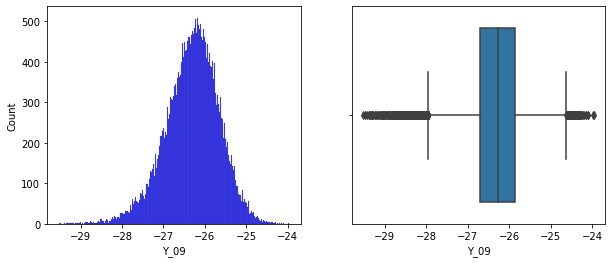

In [36]:
show_graph("Y_09")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [37]:
print(select_X('Y_09'))

['X_48', 'X_20', 'X_30', 'X_42', 'X_03', 'X_32', 'X_22', 'X_52', 'X_40', 'X_17', 'X_18', 'X_15', 'X_04', 'X_23', 'X_47', 'X_51', 'X_55', 'X_09', 'X_12', 'X_41', 'X_10', 'X_14', 'X_56', 'X_54', 'X_53', 'X_35']


## Y_10 : 신호대 잡음비 (각도4)

               Y_10
count  39607.000000
mean     -22.400062
std        0.920952
min      -31.119000
25%      -22.871000
50%      -22.275000
75%      -21.791000
max      -20.052000


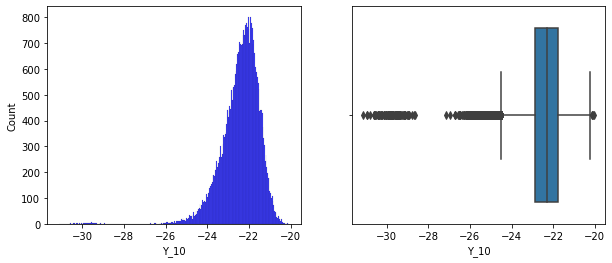

In [38]:
show_graph("Y_10")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [39]:
print(select_X('Y_10'))

['X_48', 'X_04', 'X_23', 'X_47', 'X_18', 'X_15', 'X_22', 'X_42', 'X_30', 'X_56', 'X_49', 'X_03', 'X_09', 'X_51', 'X_16', 'X_27', 'X_24', 'X_41', 'X_32', 'X_45', 'X_17', 'X_21', 'X_01', 'X_40', 'X_55', 'X_52', 'X_54', 'X_53', 'X_29', 'X_10', 'X_08', 'X_44', 'X_31', 'X_50', 'X_07']


## Y_11 : 안테나 Gain 평균 (각도4)

               Y_11
count  39607.000000
mean      24.325061
std        0.830197
min       19.844000
25%       23.836000
50%       24.420000
75%       24.911500
max       26.703000


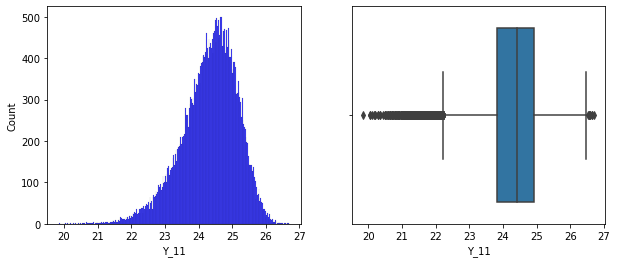

In [40]:
show_graph("Y_11")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [41]:
print(select_X('Y_11'))

['X_48', 'X_17', 'X_18', 'X_15', 'X_30', 'X_51', 'X_42', 'X_03', 'X_01', 'X_56', 'X_05', 'X_54', 'X_31', 'X_21', 'X_52', 'X_55', 'X_10', 'X_50', 'X_04', 'X_23', 'X_47', 'X_32', 'X_09', 'X_33', 'X_35']


## Y_12 : 신호대 잡음비 (각도5)

               Y_12
count  39607.000000
mean     -26.237762
std        0.656329
min      -29.544000
25%      -26.630000
50%      -26.198000
75%      -25.799000
max      -23.722000


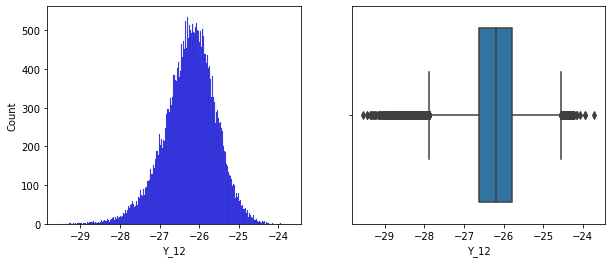

In [42]:
show_graph("Y_12")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [43]:
print(select_X('Y_12'))

['X_48', 'X_20', 'X_30', 'X_42', 'X_03', 'X_32', 'X_22', 'X_56', 'X_40', 'X_18', 'X_15', 'X_51', 'X_04', 'X_23', 'X_47', 'X_09', 'X_13', 'X_10', 'X_41', 'X_55', 'X_52', 'X_12', 'X_54', 'X_53', 'X_35']


## Y_13 : 신호대 잡음비 (각도6)

               Y_13
count  39607.000000
mean     -26.233869
std        0.655090
min      -29.448000
25%      -26.624000
50%      -26.193000
75%      -25.794000
max      -23.899000


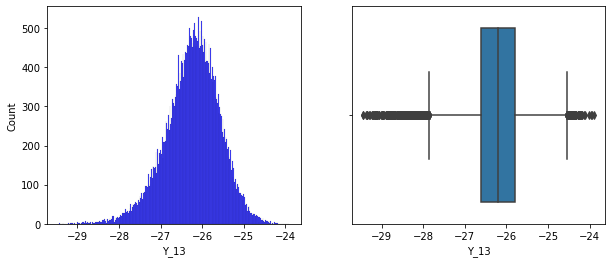

In [44]:
show_graph("Y_13")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [45]:
print(select_X('Y_13'))

['X_48', 'X_20', 'X_30', 'X_42', 'X_03', 'X_32', 'X_22', 'X_52', 'X_40', 'X_17', 'X_18', 'X_15', 'X_51', 'X_04', 'X_23', 'X_47', 'X_09', 'X_55', 'X_10', 'X_56', 'X_41', 'X_14', 'X_12', 'X_54', 'X_53', 'X_35']


## Y_14 : 신호대 잡음비 (각도7)

               Y_14
count  39607.000000
mean     -26.245868
std        0.655989
min      -29.620000
25%      -26.640000
50%      -26.204000
75%      -25.809000
max      -23.856000


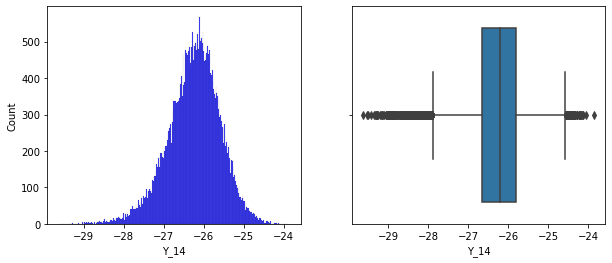

In [46]:
show_graph("Y_14")

### X 변수 선택 : 단계별 선택법(Forward stepwise Selection)

In [47]:
print(select_X('Y_14'))

['X_48', 'X_20', 'X_32', 'X_30', 'X_03', 'X_42', 'X_22', 'X_52', 'X_40', 'X_18', 'X_15', 'X_04', 'X_23', 'X_47', 'X_51', 'X_55', 'X_09', 'X_27', 'X_10', 'X_56', 'X_54', 'X_41', 'X_13', 'X_53', 'X_12', 'X_35']
